# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Read the dataset

In [2]:
dataset=pd.read_csv(r'C:\Users\rohin\OneDrive\Desktop\Datasets\Medical Cost.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1330 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1330.000000,1338.000000,1338.000000
mean,39.207025,30.664289,1.094918,13270.422265
std,14.049960,6.093764,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.656250,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#checking for null values
dataset.isnull().any()

age         False
sex         False
bmi          True
children    False
smoker       True
region      False
charges     False
dtype: bool

In [8]:
#checking for how many missing values
dataset.isnull().sum()

age         0
sex         0
bmi         8
children    0
smoker      3
region      0
charges     0
dtype: int64

# DATA PREPROCESSING

# Handling the Missing values

In [9]:
dataset.mean()

age            39.207025
bmi            30.664289
children        1.094918
charges     13270.422265
dtype: float64

In [10]:
#filling the missing values with mean
dataset.fillna(dataset.mean(),inplace=True)

In [11]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker       True
region      False
charges     False
dtype: bool

In [12]:
dataset["smoker"].value_counts()

no     1062
yes     273
Name: smoker, dtype: int64

In [13]:
#dropping the null values
dataset.dropna(inplace=True)

In [14]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [15]:
dataset.shape

(1335, 7)

# Handling the Outliers

In [16]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


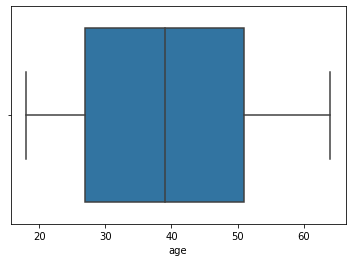

In [17]:
sns.boxplot(dataset["age"])

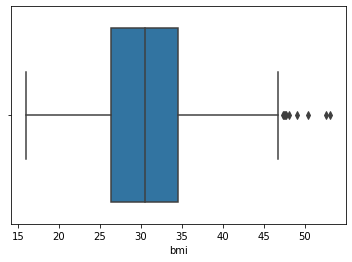

In [18]:
sns.boxplot(dataset["bmi"])

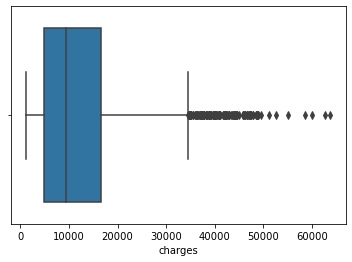

In [19]:
sns.boxplot(dataset["charges"])

# CHARGES REPLACE OUTLIER

In [20]:
dataset['charges'].describe()

count     1335.000000
mean     13256.609590
std      12081.052321
min       1121.873900
25%       4742.306100
50%       9386.161300
75%      16622.107580
max      63770.428010
Name: charges, dtype: float64

In [21]:
q1=dataset["charges"].describe()["25%"]

In [22]:
q3=dataset["charges"].describe()["75%"]

In [23]:
iqr=q3-q1

In [24]:
iqr

11879.80148

In [25]:
lower_boundary=q1-1.5*iqr

In [26]:
upper_boundary=q3+1.5*iqr

In [27]:
lower_boundary

-13077.39612

In [28]:
upper_boundary

34441.8098

In [29]:
dataset[dataset["charges"]<lower_boundary]

,age,sex,bmi,children,smoker,region,charges


In [30]:
dataset[dataset["charges"]>upper_boundary]

,age,sex,bmi,children,smoker,region,charges
14,27,male,30.664289,0,yes,southeast,39611.75770
19,30,male,35.300000,0,yes,southwest,36837.46700
23,34,female,31.920000,1,yes,northeast,37701.87680
29,31,male,36.300000,2,yes,southwest,38711.00000
30,22,male,35.600000,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360000,0,yes,southeast,62592.87309
1301,62,male,30.875000,3,yes,northwest,46718.16325
1303,43,male,27.800000,0,yes,southwest,37829.72420
1313,19,female,34.700000,2,yes,southwest,36397.57600


In [31]:
upper_boundary

34441.8098

In [32]:
upper_outliers=dataset[dataset["charges"]>upper_boundary]['charges'].values

In [33]:
upper_outliers

array([39611.7577 , 36837.467  , 37701.8768 , 38711.     , 35585.576  ,
       51194.55914, 39774.2763 , 38709.176  , 37742.5757 , 47496.49445,
       37165.1638 , 39836.519  , 43578.9394 , 47291.055  , 47055.5321 ,
       39556.4945 , 40720.55105, 36950.2567 , 36149.4835 , 48824.45   ,
       43753.33705, 37133.8982 , 34779.615  , 38511.6283 , 35160.13457,
       47305.305  , 44260.7499 , 41097.16175, 43921.1837 , 36219.40545,
       46151.1245 , 42856.838  , 48549.17835, 47896.79135, 42112.2356 ,
       38746.3551 , 42124.5153 , 34838.873  , 35491.64   , 42760.5022 ,
       47928.03   , 48517.56315, 41919.097  , 36085.219  , 38126.2465 ,
       42303.69215, 46889.2612 , 46599.1084 , 39125.33225, 37079.372  ,
       35147.52848, 48885.13561, 36197.699  , 38245.59327, 48675.5177 ,
       63770.42801, 45863.205  , 39983.42595, 45702.02235, 58571.07448,
       43943.8761 , 39241.442  , 42969.8527 , 40182.246  , 34617.84065,
       42983.4585 , 42560.4304 , 40003.33225, 45710.20785, 46200

In [34]:
{}.fromkeys(upper_outliers)

{39611.7577: None,
 36837.467000000004: None,
 37701.8768: None,
 38711.0: None,
 35585.576: None,
 51194.55914: None,
 39774.2763: None,
 38709.176: None,
 37742.5757: None,
 47496.49445: None,
 37165.1638: None,
 39836.519: None,
 43578.9394: None,
 47291.055: None,
 47055.5321: None,
 39556.4945: None,
 40720.55105: None,
 36950.2567: None,
 36149.4835: None,
 48824.45: None,
 43753.33705: None,
 37133.8982: None,
 34779.615: None,
 38511.6283: None,
 35160.13457: None,
 47305.305: None,
 44260.7499: None,
 41097.16175: None,
 43921.1837: None,
 36219.40545: None,
 46151.1245: None,
 42856.837999999996: None,
 48549.17835: None,
 47896.79135: None,
 42112.2356: None,
 38746.3551: None,
 42124.5153: None,
 34838.873: None,
 35491.64: None,
 42760.5022: None,
 47928.03: None,
 48517.56315: None,
 41919.097: None,
 36085.219: None,
 38126.2465: None,
 42303.69215: None,
 46889.2612: None,
 46599.1084: None,
 39125.33225: None,
 37079.372: None,
 35147.52848: None,
 48885.135610000005: 

In [35]:
outlier_replace={}.fromkeys(upper_outliers,upper_boundary)

In [36]:
outlier_replace

{39611.7577: 34441.8098,
 36837.467000000004: 34441.8098,
 37701.8768: 34441.8098,
 38711.0: 34441.8098,
 35585.576: 34441.8098,
 51194.55914: 34441.8098,
 39774.2763: 34441.8098,
 38709.176: 34441.8098,
 37742.5757: 34441.8098,
 47496.49445: 34441.8098,
 37165.1638: 34441.8098,
 39836.519: 34441.8098,
 43578.9394: 34441.8098,
 47291.055: 34441.8098,
 47055.5321: 34441.8098,
 39556.4945: 34441.8098,
 40720.55105: 34441.8098,
 36950.2567: 34441.8098,
 36149.4835: 34441.8098,
 48824.45: 34441.8098,
 43753.33705: 34441.8098,
 37133.8982: 34441.8098,
 34779.615: 34441.8098,
 38511.6283: 34441.8098,
 35160.13457: 34441.8098,
 47305.305: 34441.8098,
 44260.7499: 34441.8098,
 41097.16175: 34441.8098,
 43921.1837: 34441.8098,
 36219.40545: 34441.8098,
 46151.1245: 34441.8098,
 42856.837999999996: 34441.8098,
 48549.17835: 34441.8098,
 47896.79135: 34441.8098,
 42112.2356: 34441.8098,
 38746.3551: 34441.8098,
 42124.5153: 34441.8098,
 34838.873: 34441.8098,
 35491.64: 34441.8098,
 42760.5022: 3

In [37]:
dataset["charges"]=dataset["charges"].replace(outlier_replace)

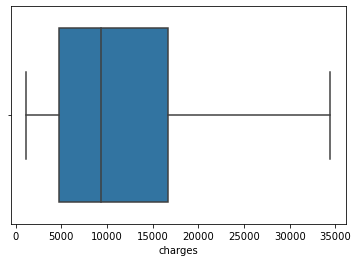

In [38]:
sns.boxplot(dataset["charges"])

In [39]:
dataset["charges"].mean()

12469.091553370075

# BMI REPLACE OUTLIER

In [40]:
dataset['bmi'].describe()

count    1335.000000
mean       30.659835
std         6.074329
min        15.960000
25%        26.315000
50%        30.495000
75%        34.590000
max        53.130000
Name: bmi, dtype: float64

In [41]:
q11=dataset["bmi"].describe()["25%"]

In [42]:
q31=dataset["bmi"].describe()["75%"]

In [43]:
iqr1=q31-q11

In [44]:
iqr1

8.275000000000002

In [45]:
lower_boundary1=q11-1.5*iqr1

In [46]:
upper_boundary1=q31+1.5*iqr1

In [47]:
lower_boundary1

13.902499999999998

In [48]:
upper_boundary1

47.002500000000005

In [49]:
dataset[dataset["bmi"]<lower_boundary1]

,age,sex,bmi,children,smoker,region,charges


In [50]:
dataset[dataset["bmi"]>upper_boundary1]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
286,46,female,48.07,2,no,northeast,9432.9253
401,47,male,47.52,1,no,southeast,8083.9198
543,54,female,47.41,0,yes,southeast,34441.8098
847,23,male,50.38,1,no,southeast,2438.0552
860,37,female,47.60,2,yes,southwest,34441.8098
1047,22,male,52.58,1,yes,southeast,34441.8098
1088,52,male,47.74,1,no,southeast,9748.9106
1317,18,male,53.13,0,no,southeast,1163.4627


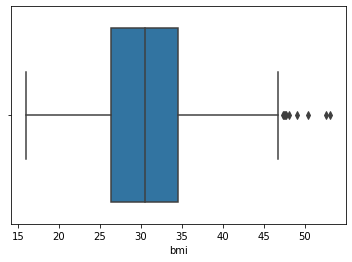

In [51]:
sns.boxplot(dataset['bmi'])

In [52]:
upper_outliers1=dataset[dataset["bmi"]>upper_boundary1]["bmi"].values

In [53]:
upper_outliers1

array([49.06, 48.07, 47.52, 47.41, 50.38, 47.6 , 52.58, 47.74, 53.13])

In [54]:
{}.fromkeys(upper_outliers1)

{49.06: None,
 48.07: None,
 47.52: None,
 47.41: None,
 50.38: None,
 47.6: None,
 52.58: None,
 47.74: None,
 53.13: None}

In [55]:
outlier_replace1={}.fromkeys(upper_outliers1,upper_boundary1)

In [56]:
outlier_replace1

{49.06: 47.002500000000005,
 48.07: 47.002500000000005,
 47.52: 47.002500000000005,
 47.41: 47.002500000000005,
 50.38: 47.002500000000005,
 47.6: 47.002500000000005,
 52.58: 47.002500000000005,
 47.74: 47.002500000000005,
 53.13: 47.002500000000005}

In [57]:
dataset["bmi"]=dataset["bmi"].replace(outlier_replace1)

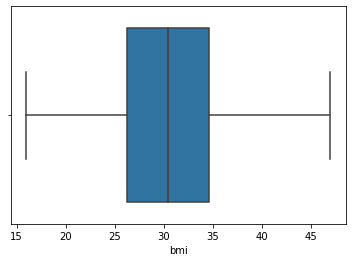

In [58]:
sns.boxplot(dataset["bmi"])

In [59]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


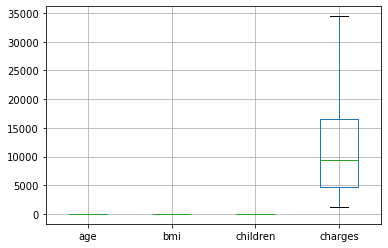

In [60]:
dataset.boxplot()

# Handling Categorical Text Data


In [61]:
dataset.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
from sklearn.compose import ColumnTransformer

In [64]:
oh=OneHotEncoder()

In [65]:
ct=ColumnTransformer(transformers=[("ohe",oh,["region"])],remainder="passthrough")

In [66]:
ct.fit_transform(dataset)

array([[0.0, 0.0, 0.0, ..., 0, 'yes', 16884.924],
       [0.0, 0.0, 1.0, ..., 1, 'no', 1725.5523],
       [0.0, 0.0, 1.0, ..., 3, 'no', 4449.462],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 'no', 1629.8335],
       [0.0, 0.0, 0.0, ..., 0, 'no', 2007.945],
       [0.0, 1.0, 0.0, ..., 0, 'yes', 29141.3603]], dtype=object)

In [67]:
np.set_printoptions(precision=2,suppress=True)

In [68]:
dataset=ct.fit_transform(dataset)

In [69]:
dataset

array([[0.0, 0.0, 0.0, ..., 0, 'yes', 16884.924],
       [0.0, 0.0, 1.0, ..., 1, 'no', 1725.5523],
       [0.0, 0.0, 1.0, ..., 3, 'no', 4449.462],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 'no', 1629.8335],
       [0.0, 0.0, 0.0, ..., 0, 'no', 2007.945],
       [0.0, 1.0, 0.0, ..., 0, 'yes', 29141.3603]], dtype=object)

In [70]:
pd.DataFrame(dataset)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,1,19,female,27.9,0,yes,16884.9
1,0,0,1,0,18,male,33.77,1,no,1725.55
2,0,0,1,0,28,male,33,3,no,4449.46
3,0,1,0,0,33,male,22.705,0,no,21984.5
4,0,1,0,0,32,male,28.88,0,no,3866.86
...,...,...,...,...,...,...,...,...,...,...
1330,0,1,0,0,50,male,30.97,3,no,10600.5
1331,1,0,0,0,18,female,31.92,0,no,2205.98
1332,0,0,1,0,18,female,36.85,0,no,1629.83
1333,0,0,0,1,21,female,25.8,0,no,2007.94


In [71]:
dataset=pd.DataFrame(dataset,columns=["southwest","southeast","northwest","northeast","age","sex","bmi","children","smoker","charges"])

In [72]:
dataset

,southwest,southeast,northwest,northeast,age,sex,bmi,children,smoker,charges
0,0,0,0,1,19,female,27.9,0,yes,16884.9
1,0,0,1,0,18,male,33.77,1,no,1725.55
2,0,0,1,0,28,male,33,3,no,4449.46
3,0,1,0,0,33,male,22.705,0,no,21984.5
4,0,1,0,0,32,male,28.88,0,no,3866.86
...,...,...,...,...,...,...,...,...,...,...
1330,0,1,0,0,50,male,30.97,3,no,10600.5
1331,1,0,0,0,18,female,31.92,0,no,2205.98
1332,0,0,1,0,18,female,36.85,0,no,1629.83
1333,0,0,0,1,21,female,25.8,0,no,2007.94


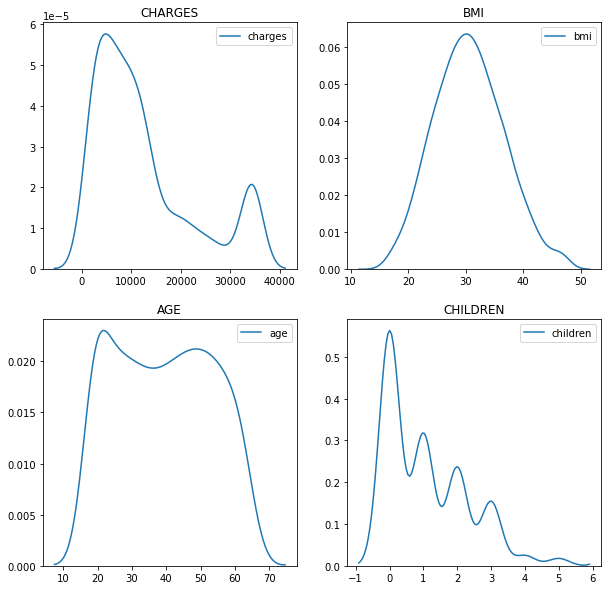

In [95]:
fig,ax=plt.subplots(2,2,figsize=(10,10))

sns.kdeplot(dataset['charges'],ax=ax[0,0])
ax[0,0].set_title('CHARGES')

sns.kdeplot(dataset['bmi'],ax=ax[0,1])
ax[0,1].set_title('BMI')

sns.kdeplot(dataset['age'],ax=ax[1,0])
ax[1,0].set_title('AGE')

sns.kdeplot(dataset['children'],ax=ax[1,1])
ax[1,1].set_title('CHILDREN')

plt.show()



# STANDARD NORMAL DISTRIBUTION

In [96]:
data=dataset.iloc[:,[4,6,7,9]]

In [97]:
from sklearn import preprocessing

In [98]:
col_names=data.columns

In [99]:
scaler=preprocessing.StandardScaler()

In [100]:
scaled_dataset=scaler.fit_transform(data)

In [101]:
scaled_dataset=pd.DataFrame(scaled_dataset,columns=col_names)

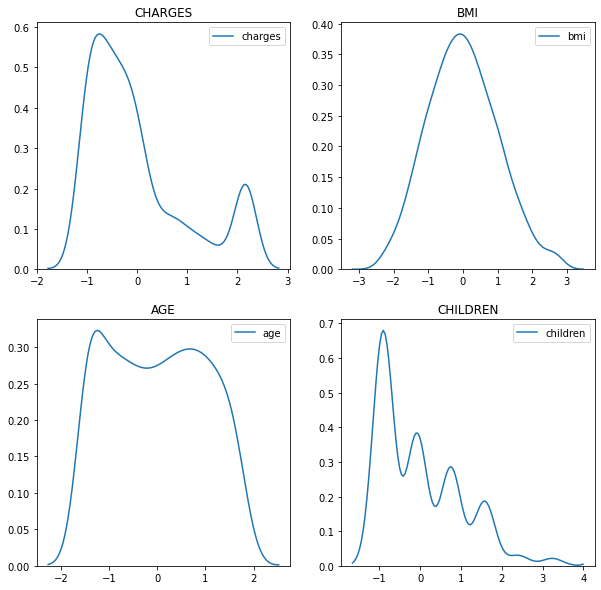

In [103]:
fig,ax=plt.subplots(2,2,figsize=(10,10))

sns.kdeplot(scaled_dataset['charges'],ax=ax[0,0])
ax[0,0].set_title('CHARGES')

sns.kdeplot(scaled_dataset['bmi'],ax=ax[0,1])
ax[0,1].set_title('BMI')

sns.kdeplot(scaled_dataset['age'],ax=ax[1,0])
ax[1,0].set_title('AGE')

sns.kdeplot(scaled_dataset['children'],ax=ax[1,1])
ax[1,1].set_title('CHILDREN')

plt.show()


In [104]:
scaled_dataset.std()

age         1.000375
bmi         1.000375
children    1.000375
charges     1.000375
dtype: float64

In [105]:
scaled_dataset.mean()

age        -1.338921e-16
bmi         6.799388e-16
children   -7.301692e-17
charges     2.378455e-17
dtype: float64